# Sentiment Analysis and Stock Prediction Model

This project made by Divij Jasuja and Pranay Raturi for Data Mining Project

In [6]:
%pip install torch torchmetrics


  Using cached torch-2.3.0-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Using cached torchmetrics-1.3.2-py3-none-any.whl.metadata (19 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
  Using cached MarkupSafe-2.1.5-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.3.0-cp311-cp311-win_amd64.whl (159.8 MB)
Using cached torchmetrics-1.3.2-py3-none-any.whl (841 kB)
Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl (3.5 MB)
Using cached tbb-2021.12.0-py3-none-win_amd64.whl (286 k

In [26]:
# importing libraries
import torch
from torch import nn
from torch import optim
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
from tqdm import tqdm

d:\projects\sentiment analysis and stock prediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Sentiment Analysis using roberta

In [4]:
%pip install transformers

  Using cached transformers-4.40.1-py3-none-any.whl.metadata (137 kB)
  Using cached filelock-3.14.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached huggingface_hub-0.22.2-py3-none-any.whl.metadata (12 kB)
  Using cached PyYAML-6.0.1-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached regex-2024.4.28-cp311-cp311-win_amd64.whl.metadata (41 kB)
  Using cached tokenizers-0.19.1-cp311-none-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.4.3-cp311-none-win_amd64.whl.metadata (3.9 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
Using cached transformers-4.40.1-py3-none-any.whl (9.0 MB)
Using cached huggingface_hub-0.22.2-py3-none-any.whl (388 kB)
Using cached PyYAML-6.0.1-cp311-cp311-win_amd64.whl (144 kB)
Using cached regex-2024.4.28-cp311-cp311-win_amd64.whl (268 kB)
Using cached safetensors-0.4.3-cp311-none-win_amd64.whl (287 kB)
Using cached tokenizers-0.19.1-cp311-none-win_amd64.whl (2.2 MB)
Using cached filelock-3.14.0-py3-none-any.whl (12 kB

In [4]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
text = "stocks are ok"
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores.argmax()

2

In [2]:
tweets = pd.read_csv('twitter_data/NVDA_final-tweets')
tweets.head()

,Unnamed: 0,Tweet_ID,Time_Created,Text,Likes,Retweets,cleaned
0,0,1744146496243822931,2024-01-07,"@SelfMadeMastery Best: $NVDA, $CRWD, $META, $T...",1,0,best nvda crwd meta tsla bad enph use oppurtun...
1,1,1744146280576926128,2024-01-07,Most Notable #Earnings Week of JAN 8th\n\n◦ Mo...,0,0,notable earnings week jan mon accd tues tlry a...
2,2,1744145386850422822,2024-01-07,🇺🇸 U.S. ECONOMIC DATA 2ND WEEK\n\nTHURS.\n◦ U....,0,0,flag united state economic data week thurs cpi...
3,3,1744145096592007411,2024-01-07,$MARA We nailed this play. I kept on hammering...,3,0,mara nail play kept hammer risk reward hence l...
4,4,1743200305033175350,2024-01-05,$MARA Scaled out of this position yesterday\n\...,1,0,mara scale position yesterday last time specul...


In [17]:
def sentiment_analysis(text):
    encoded_input = tokenizer(text, return_tensors='pt',truncation=True, max_length=512)
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores.argmax()

In [19]:
tqdm.pandas()
tweets['cleaned'] = tweets['cleaned'].fillna("")
tweets['sentiment'] = tweets['cleaned'].progress_apply(lambda x: sentiment_analysis(x))

100%|██████████| 269199/269199 [5:52:34<00:00, 12.73it/s]  


In [20]:
tweets.to_csv('analysed_tweets.csv')

In [7]:
df = pd.read_csv("twitter_data/analysed_tweets.csv")
df.head()

,Unnamed: 0,Tweet_ID,Time_Created,Text,Likes,Retweets,cleaned,sentiment
0,0,1741926827688681728,2024-01-01,"Our analyst called the PUMP on $FLJ, securing ...",0,0,analyst call pump flj secure free trial member...,1
1,1,1741855632767004892,2024-01-01,Stocks Performance Upto 1Y\n\nEverything is aw...,0,0,stock performance upto everything awesome tsla...,2
2,2,1741856010761802082,2024-01-01,Were you invested in $NVDA pre 2021? \n\nIf th...,14,2,invest nvda pre answer yes see make think good...,2
3,3,1741856822917513633,2024-01-01,Top 3 Bearish Sentiment Cryptos: CROWD\n\n 🟥 $...,0,0,top bearish sentiment cryptos crowd red square...,1
4,4,1741856927926100073,2024-01-01,$nvda Top analyst price target for next week:....,0,0,nvda top analyst price target next week,1


In [12]:
sentiment_df = pd.DataFrame(df.groupby("Time_Created")['sentiment'].mean())
sentiment_df.rename(columns = {"sentiment":"sen_mean"}, inplace = True)
sentiment_df['twt_volume'] = df.groupby(['Time_Created'])['sentiment'].count()
sentiment_df['sen_sum'] = df.groupby('Time_Created')['sentiment'].sum()
sentiment_df.head()

,sen_mean,twt_volume,sen_sum
Time_Created,,,
2024-01-01,1.166667,636,742
2024-01-02,1.083774,1325,1436
2024-01-03,1.102433,1562,1722
2024-01-04,1.138872,1649,1878
2024-01-05,1.143971,2181,2495


In [13]:
nvda_stock = pd.read_csv("stock_data/NVDA_01-01-03-31")
nvda_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-02,492.440002,492.950012,475.950012,481.679993,481.657410,41125400
1,2024-01-03,474.850006,481.839996,473.200012,475.690002,475.667694,32089600
2,2024-01-04,477.670013,485.000000,475.079987,479.980011,479.957489,30653500
3,2024-01-05,484.619995,495.470001,483.059998,490.970001,490.946960,41456800
4,2024-01-08,495.119995,522.750000,494.790009,522.530029,522.505493,64251000


In [15]:
final_df = pd.merge(nvda_stock, sentiment_df, left_on = "Date", right_on = "Time_Created", how = 'inner')
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,sen_mean,twt_volume,sen_sum
0,2024-01-02,492.440002,492.950012,475.950012,481.679993,481.657410,41125400,1.083774,1325,1436
1,2024-01-03,474.850006,481.839996,473.200012,475.690002,475.667694,32089600,1.102433,1562,1722
2,2024-01-04,477.670013,485.000000,475.079987,479.980011,479.957489,30653500,1.138872,1649,1878
3,2024-01-05,484.619995,495.470001,483.059998,490.970001,490.946960,41456800,1.143971,2181,2495
4,2024-01-08,495.119995,522.750000,494.790009,522.530029,522.505493,64251000,1.106481,3888,4302


## stock prediction using LSTM

In [5]:
df = pd.read_csv('NVDA_final', index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        61 non-null     datetime64[ns]
 1   Open        61 non-null     float64       
 2   High        61 non-null     float64       
 3   Low         61 non-null     float64       
 4   Close       61 non-null     float64       
 5   Adj Close   61 non-null     float64       
 6   Volume      61 non-null     int64         
 7   sen_mean    61 non-null     float64       
 8   twt_volume  61 non-null     int64         
 9   sen_sum     61 non-null     int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 5.2 KB


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,sen_mean,twt_volume,sen_sum
0,2024-01-02,492.440002,492.950012,475.950012,481.679993,481.657410,41125400,1.083774,1325,1436
1,2024-01-03,474.850006,481.839996,473.200012,475.690002,475.667694,32089600,1.102433,1562,1722
2,2024-01-04,477.670013,485.000000,475.079987,479.980011,479.957489,30653500,1.138872,1649,1878
3,2024-01-05,484.619995,495.470001,483.059998,490.970001,490.946960,41456800,1.143971,2181,2495
4,2024-01-08,495.119995,522.750000,494.790009,522.530029,522.505493,64251000,1.106481,3888,4302


In [16]:
def assign_symbol(x):
    if x > 1:
        return 'pos'
    elif x == 1:
        return 'nue'
    else:
        return 'neg'

C:\Users\divij\AppData\Local\Temp\ipykernel_21308\2369276506.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=df["Date"],y=df['Adj Close'],hue=df['sentiment_analysis'],palette=['y','r','g'])


Text(0.5, 1.0, 'Stock market of Nvidia')

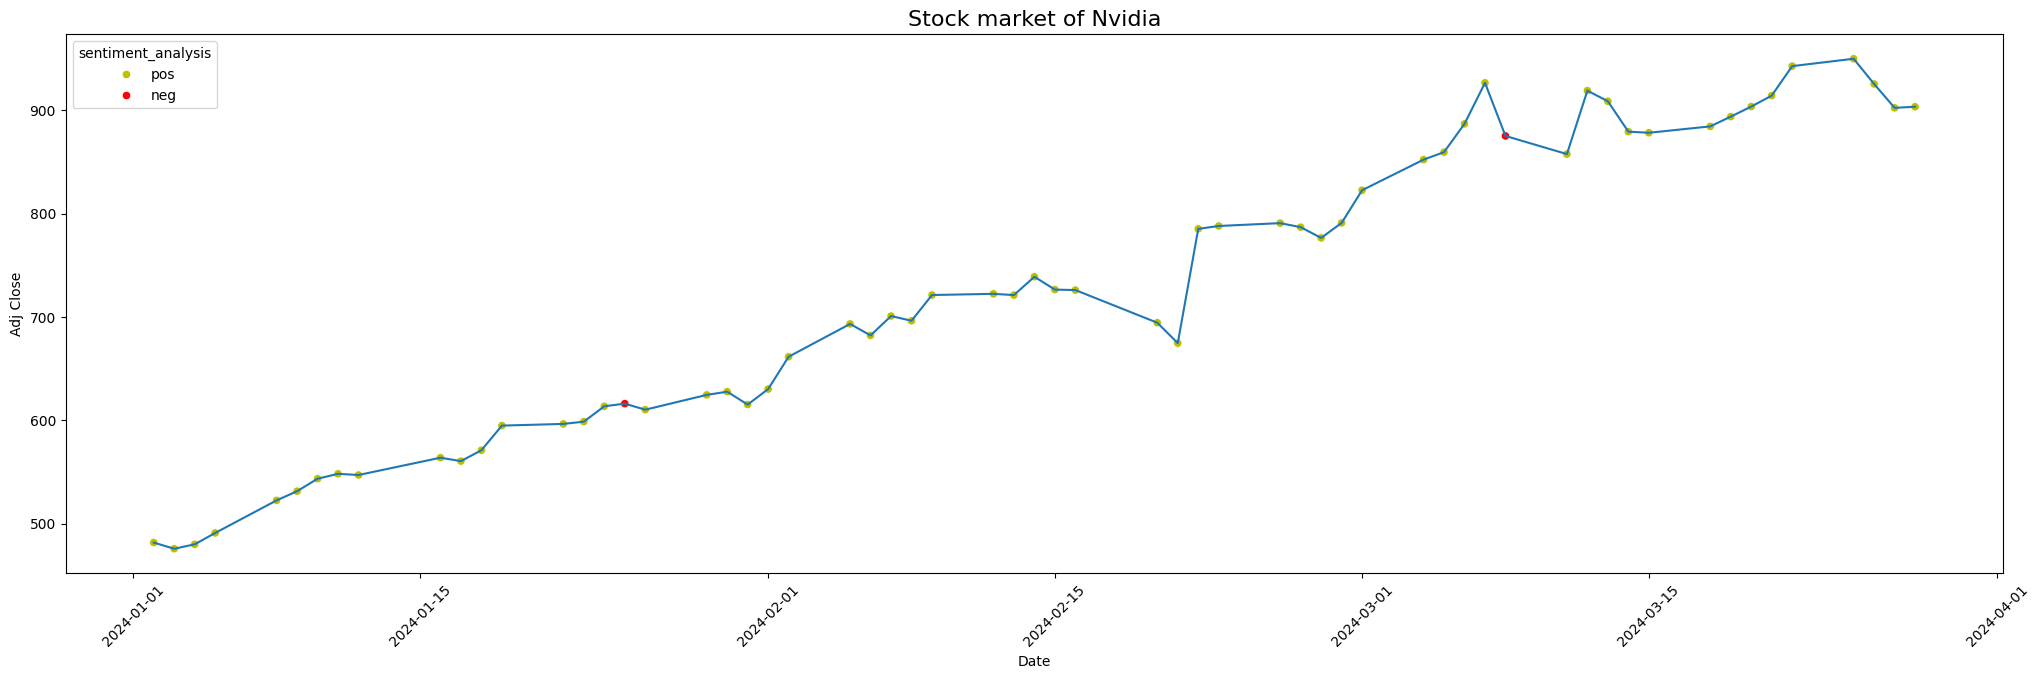

In [17]:
plt.figure(figsize=(25,7))
sns.lineplot(x=df["Date"],y=df["Adj Close"])
df['sentiment_analysis']=df['sen_mean']
df['sentiment_analysis']=df['sentiment_analysis'].apply(lambda x: assign_symbol(x))
sns.scatterplot(x=df["Date"],y=df['Adj Close'],hue=df['sentiment_analysis'],palette=['y','r','g'])
plt.xticks(rotation=45)
plt.title("Stock market of Nvidia",fontsize=16)

In [18]:
df['sentiment_analysis'].value_counts()

sentiment_analysis
pos    59
neg     2
Name: count, dtype: int64

In [22]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15)) #Check last few dates.

#Variables for training
cols = [
    'Open',
    'High', 'Low',
    'Close',
    'Volume',
    'Adj Close',
    'sen_mean',
        ]
#Date and volume columns are not used in training.
print(cols)

#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)
df_for_training.index=df['Date']
df_for_training

46   2024-03-08
47   2024-03-11
48   2024-03-12
49   2024-03-13
50   2024-03-14
51   2024-03-15
52   2024-03-18
53   2024-03-19
54   2024-03-20
55   2024-03-21
56   2024-03-22
57   2024-03-25
58   2024-03-26
59   2024-03-27
60   2024-03-28
Name: Date, dtype: datetime64[ns]
['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'sen_mean']


,Open,High,Low,Close,Volume,Adj Close,sen_mean
Date,,,,,,,
2024-01-02,492.440002,492.950012,475.950012,481.679993,41125400.0,481.657410,1.083774
2024-01-03,474.850006,481.839996,473.200012,475.690002,32089600.0,475.667694,1.102433
2024-01-04,477.670013,485.000000,475.079987,479.980011,30653500.0,479.957489,1.138872
2024-01-05,484.619995,495.470001,483.059998,490.970001,41456800.0,490.946960,1.143971
2024-01-08,495.119995,522.750000,494.790009,522.530029,64251000.0,522.505493,1.106481
...,...,...,...,...,...,...,...
2024-03-22,911.409973,947.780029,908.340027,942.890015,58521500.0,942.890015,1.140387
2024-03-25,939.409973,967.659973,935.099976,950.020020,55213600.0,950.020020,1.146554
2024-03-26,958.510010,963.750000,925.020020,925.609985,51364800.0,925.609985,1.069724


In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

scaler_for_inference = MinMaxScaler()
scaler_for_inference.fit_transform(df_for_training.loc[:,['Open','Adj Close']])

df_for_training_scaled

array([[0.03636852, 0.02257399, 0.00595367, 0.01262832, 0.13908405,
        0.01262714, 0.67713891],
       [0.        , 0.        , 0.        , 0.        , 0.03130226,
        0.        , 0.74564109],
       [0.00583056, 0.00642068, 0.00407009, 0.00904435, 0.01417202,
        0.00904348, 0.879418  ],
       [0.02020012, 0.02769426, 0.02134658, 0.03221386, 0.14303709,
        0.0322108 , 0.89813617],
       [0.04190958, 0.08312338, 0.04674171, 0.09874987, 0.41493328,
        0.09874053, 0.76050481],
       [0.10164166, 0.1247765 , 0.09460926, 0.11744992, 0.57070503,
        0.11743893, 0.75307588],
       [0.12676253, 0.13036412, 0.13355706, 0.14295953, 0.2852559 ,
        0.14294605, 0.72842884],
       [0.15535704, 0.14552183, 0.13509411, 0.15291035, 0.36036009,
        0.15289602, 0.7309968 ],
       [0.147521  , 0.13788202, 0.15176441, 0.15054913, 0.06897543,
        0.15053504, 1.        ],
       [0.15574988, 0.17577613, 0.16410477, 0.18579892, 0.18480048,
        0.1857815 , 0.6

In [34]:
df_for_training_scaled.shape

(61, 7)

In [27]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future,[0,-2]])

trainX, trainY = np.array(trainX), np.array(trainY)

print('TrainX shape = {}.'.format(trainX.shape))
print('TrainY shape = {}.'.format(trainY.shape))

TrainX shape = (56, 5, 7).
TrainY shape = (56, 1, 2).


In [28]:
from sklearn.model_selection import train_test_split

X_train_lstm_without_twitter, X_test_lstm_without_twitter, y_train_lstm_without_twitter, y_test_lstm_without_twitter = train_test_split(trainX[:,:,:-1], trainY, test_size=0.2, shuffle=False)

X_train_lstm_twitter, X_test_lstm_twitter, y_train_lstm_twitter, y_test_lstm_twitter = train_test_split(trainX, trainY, test_size=0.2, shuffle=False)

X_train_lstm_without_twitter.shape,X_train_lstm_twitter.shape

((44, 5, 6), (44, 5, 7))

In [29]:
from sklearn.model_selection import train_test_split

X_train_lstm_without_twitter, X_val_lstm_without_twitter, y_train_lstm_without_twitter, y_val_lstm_without_twitter = train_test_split(X_train_lstm_without_twitter, y_train_lstm_without_twitter, test_size=0.1, shuffle=False)

X_train_lstm_twitter, X_val_lstm_twitter, y_train_lstm_twitter, y_val_lstm_twitter = train_test_split(X_train_lstm_twitter, y_train_lstm_twitter, test_size=0.1, shuffle=False)

X_train_lstm_without_twitter.shape,X_train_lstm_twitter.shape

((39, 5, 6), (39, 5, 7))

In [35]:
import torch
import torch.nn as nn
x_train = torch.from_numpy(X_train_lstm_twitter).type(torch.Tensor)
x_test = torch.from_numpy(X_test_lstm_twitter).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train_lstm_twitter).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test_lstm_twitter).type(torch.Tensor)

In [40]:
input_dim = 7
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [41]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [42]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [43]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []
for t in range(num_epochs):
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

d:\projects\sentiment analysis and stock prediction\.venv\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39, 1, 2])) that is different to the input size (torch.Size([39, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch  0 MSE:  0.23507378995418549
Epoch  1 MSE:  0.14666497707366943
Epoch  2 MSE:  0.0820721834897995
Epoch  3 MSE:  0.040639761835336685
Epoch  4 MSE:  0.0632639080286026
Epoch  5 MSE:  0.05729605630040169
Epoch  6 MSE:  0.03987731412053108
Epoch  7 MSE:  0.03764742985367775
Epoch  8 MSE:  0.042858678847551346
Epoch  9 MSE:  0.0468616783618927
Epoch  10 MSE:  0.047194793820381165
Epoch  11 MSE:  0.044715765863657
Epoch  12 MSE:  0.04115617647767067
Epoch  13 MSE:  0.03815871849656105
Epoch  14 MSE:  0.03683756664395332
Epoch  15 MSE:  0.037413083016872406
Epoch  16 MSE:  0.03904778137803078
Epoch  17 MSE:  0.04033451899886131
Epoch  18 MSE:  0.04035644605755806
Epoch  19 MSE:  0.03928157314658165
Epoch  20 MSE:  0.0379316583275795
Epoch  21 MSE:  0.03701990097761154
Epoch  22 MSE:  0.03678710013628006
Epoch  23 MSE:  0.03707851469516754
Epoch  24 MSE:  0.03757867217063904
Epoch  25 MSE:  0.03799951821565628
Epoch  26 MSE:  0.038170330226421356
Epoch  27 MSE:  0.03805334493517876
Epo

In [46]:
y_test_pred = model(x_test)
loss = criterion(y_test_pred, y_test_lstm)
loss

d:\projects\sentiment analysis and stock prediction\.venv\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([12, 1, 2])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.2310, grad_fn=<MseLossBackward0>)

In [48]:
import torch
import torch.nn as nn
x_train = torch.from_numpy(X_train_lstm_without_twitter).type(torch.Tensor)
x_test = torch.from_numpy(X_test_lstm_without_twitter).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train_lstm_without_twitter).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test_lstm_without_twitter).type(torch.Tensor)
input_dim = 6
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
import time
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []
for t in range(num_epochs):
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))
y_test_pred = model(x_test)
loss = criterion(y_test_pred, y_test_lstm)
loss

d:\projects\sentiment analysis and stock prediction\.venv\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([39, 1, 2])) that is different to the input size (torch.Size([39, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch  0 MSE:  0.09552318602800369
Epoch  1 MSE:  0.05191328004002571
Epoch  2 MSE:  0.037802595645189285
Epoch  3 MSE:  0.050637323409318924
Epoch  4 MSE:  0.04230595752596855
Epoch  5 MSE:  0.037011753767728806
Epoch  6 MSE:  0.03786754235625267
Epoch  7 MSE:  0.040093906223773956
Epoch  8 MSE:  0.04097239300608635
Epoch  9 MSE:  0.04034998640418053
Epoch  10 MSE:  0.03897828981280327
Epoch  11 MSE:  0.03763237223029137
Epoch  12 MSE:  0.036841996014118195
Epoch  13 MSE:  0.036800771951675415
Epoch  14 MSE:  0.03731929138302803
Epoch  15 MSE:  0.0379161462187767
Epoch  16 MSE:  0.03813870996236801
Epoch  17 MSE:  0.03788141533732414
Epoch  18 MSE:  0.037376414984464645
Epoch  19 MSE:  0.036935508251190186
Epoch  20 MSE:  0.036738019436597824
Epoch  21 MSE:  0.036787159740924835
Epoch  22 MSE:  0.03697590157389641
Epoch  23 MSE:  0.037172745913267136
Epoch  24 MSE:  0.03728089854121208
Epoch  25 MSE:  0.03726290538907051
Epoch  26 MSE:  0.03713839873671532
Epoch  27 MSE:  0.0369653925

tensor(0.2379, grad_fn=<MseLossBackward0>)